<a href="https://colab.research.google.com/github/PrathushaRekha/Disease-Diagnosis-System-Using-Human-Nail-Image/blob/main/nail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from glob import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
imageSize = [224, 224]

trainPath = r"/content/drive/MyDrive/Dataset/train"

testPath = r"/content/drive/MyDrive/Dataset/test"


In [ ]:
vgg = VGG16(input_shape=imageSize + [3], weights='imagenet',include_top=False)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
for layer in vgg.layers:
  layer.trainable = False
  print(layer)

<InputLayer name=input_layer, built=True>
<Conv2D name=block1_conv1, built=True>
<Conv2D name=block1_conv2, built=True>
<MaxPooling2D name=block1_pool, built=True>
<Conv2D name=block2_conv1, built=True>
<Conv2D name=block2_conv2, built=True>
<MaxPooling2D name=block2_pool, built=True>
<Conv2D name=block3_conv1, built=True>
<Conv2D name=block3_conv2, built=True>
<Conv2D name=block3_conv3, built=True>
<MaxPooling2D name=block3_pool, built=True>
<Conv2D name=block4_conv1, built=True>
<Conv2D name=block4_conv2, built=True>
<Conv2D name=block4_conv3, built=True>
<MaxPooling2D name=block4_pool, built=True>
<Conv2D name=block5_conv1, built=True>
<Conv2D name=block5_conv2, built=True>
<Conv2D name=block5_conv3, built=True>
<MaxPooling2D name=block5_pool, built=True>


In [ ]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(18, activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 18)             │       451,602 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,166,290 (57.85 MB)

 Trainable params: 451,602 (1.72 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'], run_eagerly=True
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(trainPath,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(testPath,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 903 images belonging to 18 classes.
Found 245 images belonging to 18 classes.


In [ ]:
training_set.class_indices

{'Darier_s disease': 0,
 'Healthy': 1,
 'Muehrck-e_s lines': 2,
 'aloperia areata': 3,
 'beau_s lines': 4,
 'bluish nail': 5,
 'clubbing': 6,
 'eczema': 7,
 'half and half nailes (Lindsay_s nails)': 8,
 'koilonychia': 9,
 'leukonychia': 10,
 'onycholycis': 11,
 'pale nail': 12,
 'red lunula': 13,
 'splinter hemmorrage': 14,
 'terry_s nail': 15,
 'white nail': 16,
 'yellow nails': 17}

In [ ]:
len(training_set)

29

In [ ]:
import sys
# fit the model
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set))

Epoch 1/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 206s 7s/step - accuracy: 0.2387 - loss: 3.1939 - val_accuracy: 0.3265 - val_loss: 2.6001
Epoch 2/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 843ms/step - accuracy: 0.3389 - loss: 2.4419 - val_accuracy: 0.4000 - val_loss: 2.1495
Epoch 3/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 901ms/step - accuracy: 0.3591 - loss: 2.2570 - val_accuracy: 0.4367 - val_loss: 1.9931
Epoch 4/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 866ms/step - accuracy: 0.3670 - loss: 2.1615 - val_accuracy: 0.3959 - val_loss: 2.2609
Epoch 5/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 850ms/step - accuracy: 0.3823 - loss: 2.2299 - val_accuracy: 0.4408 - val_loss: 1.7479
Epoch 6/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 856ms/step - accuracy: 0.3866 - loss: 2.0433 - val_accuracy: 0.5184 - val_loss: 1.6278
Epoch 7/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 42s 916ms/step - accuracy: 0.4061 - loss: 2.0011 - val_accuracy: 0.5102 - val_loss: 1.5445
Epoch 8/35
29/29 ━━━━━━━━━━━━━━━━━━━━ 25s 861ms/step - accuracy: 0.4171 - loss: 1.8715 - val_accura

In [ ]:
#save the model
model.save('vgg-16-nail-disease.h5')

In [ ]:
#import load_model class for loading h5 file
from tensorflow.keras.models import load_model
#import image class to process the images
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

In [ ]:
#load saved model file
model=load_model('vgg-16-nail-disease.h5')

In [ ]:
#load one random image from local system
img=image.load_img('/content/drive/MyDrive/Dataset/test/clubbing/10.PNG',target_size=(224,224))

In [ ]:
#convert image to array format
x = image.img_to_array(img)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
print(img_data.shape)

(1, 224, 224, 3)


In [ ]:
model.predict(img_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 3.78189e-40, 6.40966e-01, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.59034e-01,
        0.00000e+00, 0.00000e+00, 0.00000e+00]], dtype=float32)

In [ ]:
output=np.argmax(model.predict(img_data), axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


In [ ]:
# Evaluate the trained VGG16 nail disease model
test_loss, test_accuracy = model.evaluate(test_set)

# Display the results
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - accuracy: 0.6420 - loss: 1.0592
Test Loss: 1.0630545616149902
Test Accuracy: 0.6571428775787354


In [ ]:
import numpy as np

output=np.argmax([[2.4984448e-04, 7.0662162e-04, 2.1682821e-04, 1.6972199e-04, 9.9644611e-05, 9.8324293e-01, 6.6723401e-04, 5.1942193e-03, 4.8860402e-05, 2.2987171e-05, 2.5026349e-03, 3.5574668e-04, 9.6228459e-06, 4.4953203e-04, 1.4495164e-04, 5.1868602e-04, 5.3999224e-03]], axis=1)

In [ ]:
print(output)

[5]


In [ ]:
display(output)

array([5])

In [ ]:
index=['Darier_s disease', 'Healthy', 'Muehrck-e_s lines', 'aloperia areata', 'beau_s lines', 'bluish nail',
       'clubbing','eczema','half and half nailes (Lindsay_s nails)','koilonychia','leukonychia',
       'onycholycis','pale nail','red lunula','splinter hemmorrage','terry_s nail','white nail','yellow nails']
result = str(index[output[0]])
result

'bluish nail'

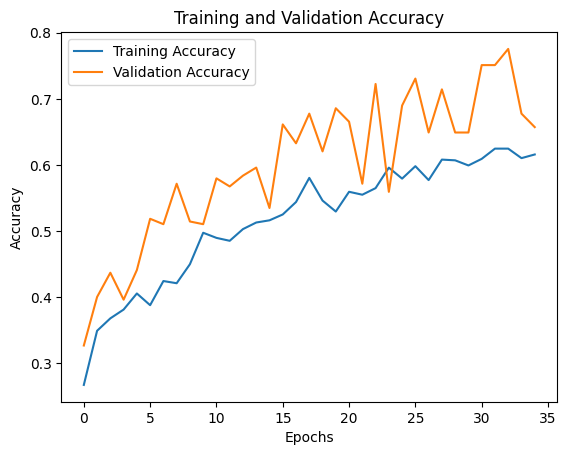

In [ ]:
# @title Default title text
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(r.history['accuracy'], label='Training Accuracy')
plt.plot(r.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss



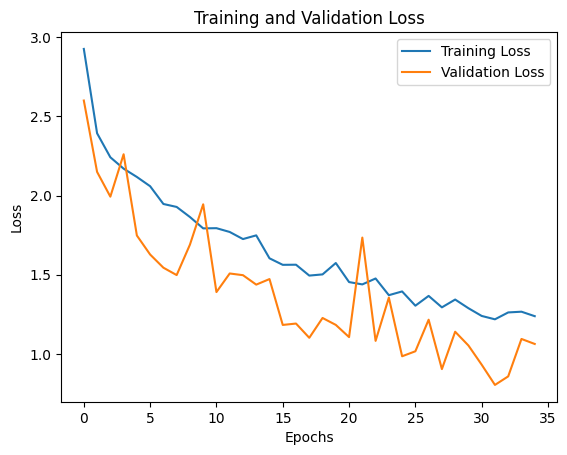

In [ ]:
plt.plot(r.history['loss'], label='Training Loss')
plt.plot(r.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
import json

# Save the trained model
model.save('vgg16-nail-disease.keras')

# Save class indices for reference during prediction
class_indices = training_set.class_indices
with open('class_indices.json', 'w') as f:
    json.dump(class_indices, f)

print("Model and class indices have been saved successfully.")


Model and class indices have been saved successfully.
